In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

1. Create a mass spring damper simulation
2. Create fake force and simulate the system
3. Create an RNN (no non-linear activation on the output) network which tries to predict the next state given the input forces and the initial state??

$ m\ddot{x}(t) = -kx(t) - d\dot{x}(t) + F $

where
- x(t) = position at time t
- m = mass
- d = damper constant
- k = spring constant
- $ \tau $ = time period

$ \dot{x}(t+\tau) = (1-\frac{d}{m}\tau)\dot{x}(t) + (\frac{-k}{m}\tau)x(t) + \frac{1}{m}\tau F(t) $

$ x(t+\tau) = \dot{x}(t)\tau + x(t) $

$ \vec{x}(t+\tau) = A\vec{x}(t) + B\vec{F}(t) $

In [142]:
tau = 1/100
freq = 1/tau

$ \vec{F} $ will be a frequency sweep

In [160]:
begin_time = 0
end_time = 100
samples = int((end_time-begin_time)*freq)

time = np.linspace(begin_time,end_time,samples,endpoint=False)

In [192]:
end_freq = 1
magnitude = 3

F = magnitude*np.sin((end_freq*time/end_time)*2*np.pi*time)
#F = np.zeros_like(time)

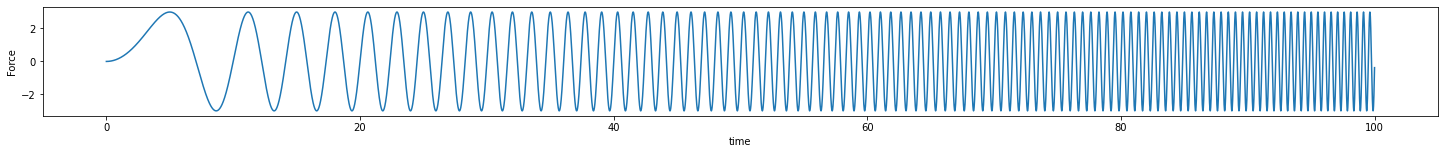

In [193]:
plt.figure(figsize=(25,2))
plt.plot(time,F)
plt.ylabel("Force")
plt.xlabel("time")
plt.show()

In [208]:
class System:
    def __init__(self, A, B, initial_state = None):
        self.A = A
        self.B = B
        self.dim = A.shape[0]
        
        if np.any(initial_state == None):
            self.state = np.random.randn(self.dim)
        else:
            self.state = initial_state
            
    def step(self,force):
        next_state = self.A @ self.state + self.B * force
        self.state = next_state
        
        return self.state

In [209]:
m = 1
d = 0.1
k = 3

A = np.array([[1-d/m*tau,-k/m*tau],
             [tau,1]])

B = np.array([tau/m,0])

In [210]:
msd = System(A,B)

In [211]:
ITERATION = len(F)

states = [msd.state]

for i in range(ITERATION):
    states.append(msd.step(F[i]))

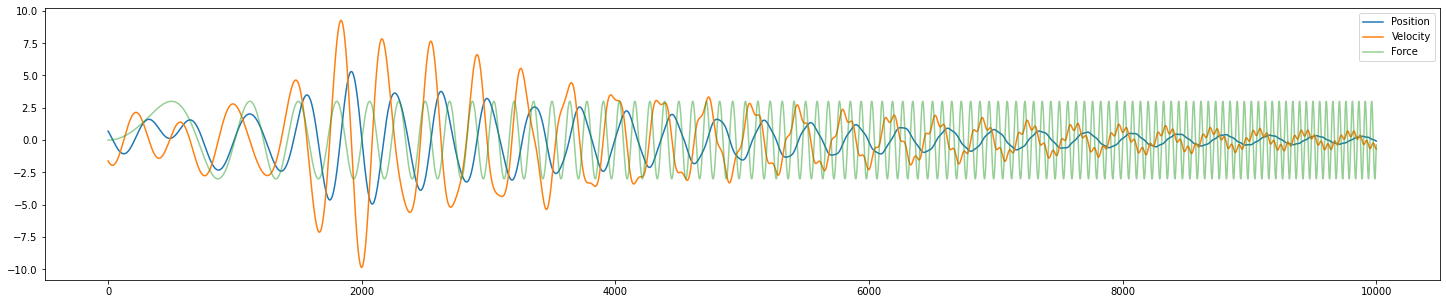

In [212]:
states = np.array(states)

plt.figure(figsize=(25,5))
plt.plot(range(ITERATION),states[1:,1],label="Position")
plt.plot(range(ITERATION),states[1:,0],label="Velocity")
plt.plot(range(ITERATION),F[:ITERATION],label="Force",alpha=0.5)
plt.legend()
plt.show()

In [213]:
np.save(f'data_msd/states{m}-{k}-{d}.npy', states)
np.save(f'data_msd/forces{m}-{k}-{d}.npy', F)

In [223]:
msd_test = System(A,B,initial_state = np.array([1,-1]))

In [232]:
F_test = np.zeros(10000)

In [233]:
ITERATION = len(F_test)

states_test = [msd_test.state]

for i in range(ITERATION):
    states_test.append(msd_test.step(F_test[i]))

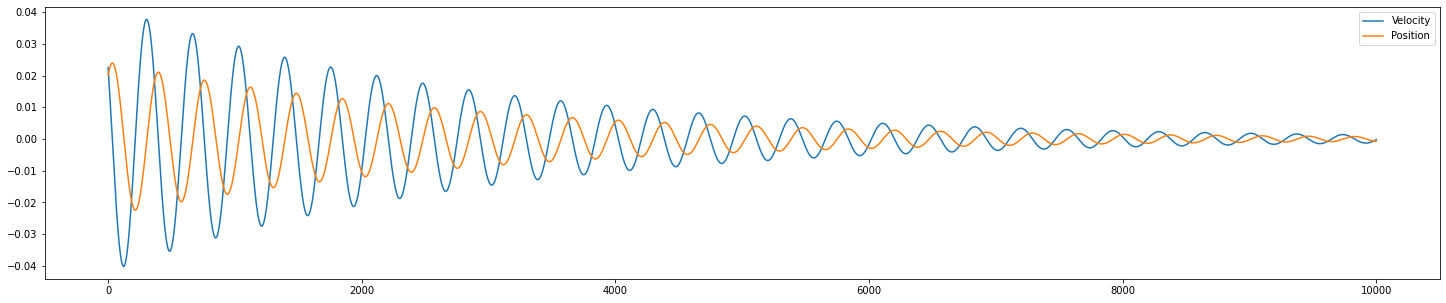

In [234]:
states_test = np.array(states_test)

plt.figure(figsize=(25,5))
plt.plot(range(ITERATION),states_test[1:,0],label="Velocity")
plt.plot(range(ITERATION),states_test[1:,1],label="Position")
plt.legend()
plt.show()